In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 



In [ ]:
# to import data file from Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read data file
df = pd.read_csv('/content/drive/MyDrive/NJ_Comm_Food_Bank_Poverty_Data _Poverty_ Data.csv')
df.head()

,row_id,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,...,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,poverty_rate
0,0,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to a large metro area,Federal/State government-dependent,0.358,0.089,0.253,0.099,0.494,0.200,...,0.154,NaN,0.317,12.0,9.33,33.75,5429.0,6949.0,b,22.6
1,2,"Nonmetro - Urban population of 2,500 to 19,999...",Micropolitan adjacent to a large metro area,Manufacturing-dependent,0.503,0.057,0.171,0.065,0.503,0.243,...,0.080,0.177,0.350,14.0,2.10,23.81,3060.0,1749.0,b,17.3
2,4,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to micro area and contains a ...,Federal/State government-dependent,0.471,0.070,0.297,0.122,0.497,0.250,...,0.079,NaN,0.259,10.0,NaN,NaN,690.0,NaN,b,24.4
3,5,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to micro area and contains a ...,Federal/State government-dependent,0.578,0.049,0.231,0.107,0.474,0.194,...,0.100,0.174,0.249,11.0,NaN,23.11,1430.0,1160.0,b,16.4
4,8,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.530,0.046,0.262,0.067,0.513,0.206,...,0.086,0.178,0.253,11.0,3.40,3.68,1700.0,1870.0,a,17.4


In [ ]:
# check the shape of the data fram
df.shape

(3198, 35)

* There are 3198 rows and 35 columns

In [ ]:
# getting info on the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 35 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   row_id                                            3198 non-null   int64  
 1   area__rucc                                        3198 non-null   object 
 2   area__urban_influence                             3198 non-null   object 
 3   econ__economic_typology                           3198 non-null   object 
 4   econ__pct_civilian_labor                          3198 non-null   float64
 5   econ__pct_unemployment                            3198 non-null   float64
 6   econ__pct_uninsured_adults                        3196 non-null   float64
 7   econ__pct_uninsured_children                      3196 non-null   float64
 8   demo__pct_female                                  3196 non-null   float64
 9   demo__pct_below_18_

* Of the 35 columns 4 are string (including year) and 31 are numerical.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
row_id,3198.0,3156.692620,1823.959278,0.000000,1561.750000,3198.500000,4723.750000,6277.000000
econ__pct_civilian_labor,3198.0,0.467071,0.074541,0.217000,0.420000,0.467000,0.514000,1.000000
econ__pct_unemployment,3198.0,0.059610,0.022850,0.008000,0.044000,0.057000,0.071000,0.240000
econ__pct_uninsured_adults,3196.0,0.217534,0.067372,0.046000,0.166000,0.216000,0.262000,0.495000
econ__pct_uninsured_children,3196.0,0.085920,0.040005,0.009000,0.057000,0.077000,0.105000,0.285000
demo__pct_female,3196.0,0.498781,0.024251,0.294000,0.493000,0.503000,0.512000,0.576000
demo__pct_below_18_years_of_age,3196.0,0.227763,0.034291,0.098000,0.207000,0.226000,0.245250,0.417000
demo__pct_aged_65_years_and_older,3196.0,0.170137,0.043594,0.043000,0.142000,0.167000,0.194000,0.355000
demo__pct_hispanic,3196.0,0.090233,0.142707,0.000000,0.019000,0.035000,0.088000,0.945000
demo__pct_non_hispanic_african_american,3196.0,0.091117,0.147104,0.000000,0.006000,0.022000,0.096250,0.855000


In [ ]:
# determining the number of unique items for row_id
df['row_id'].nunique()

3198

* There are 3198 unique items in row_id allowing us to drop the column

In [ ]:
# dropping row_id from data frame
df = df.drop(['row_id'], axis=1)

In [ ]:
df.isnull().sum()

area__rucc                                             0
area__urban_influence                                  0
econ__economic_typology                                0
econ__pct_civilian_labor                               0
econ__pct_unemployment                                 0
econ__pct_uninsured_adults                             2
econ__pct_uninsured_children                           2
demo__pct_female                                       2
demo__pct_below_18_years_of_age                        2
demo__pct_aged_65_years_and_older                      2
demo__pct_hispanic                                     2
demo__pct_non_hispanic_african_american                2
demo__pct_non_hispanic_white                           2
demo__pct_american_indian_or_alaskan_native            2
demo__pct_asian                                        2
demo__pct_adults_less_than_a_high_school_diploma       0
demo__pct_adults_with_high_school_diploma              0
demo__pct_adults_with_some_coll

In [ ]:
# Installing the missingno package
!pip install missingno

In [ ]:
# Importing the missingno package
import missingno as msno

<Axes: >

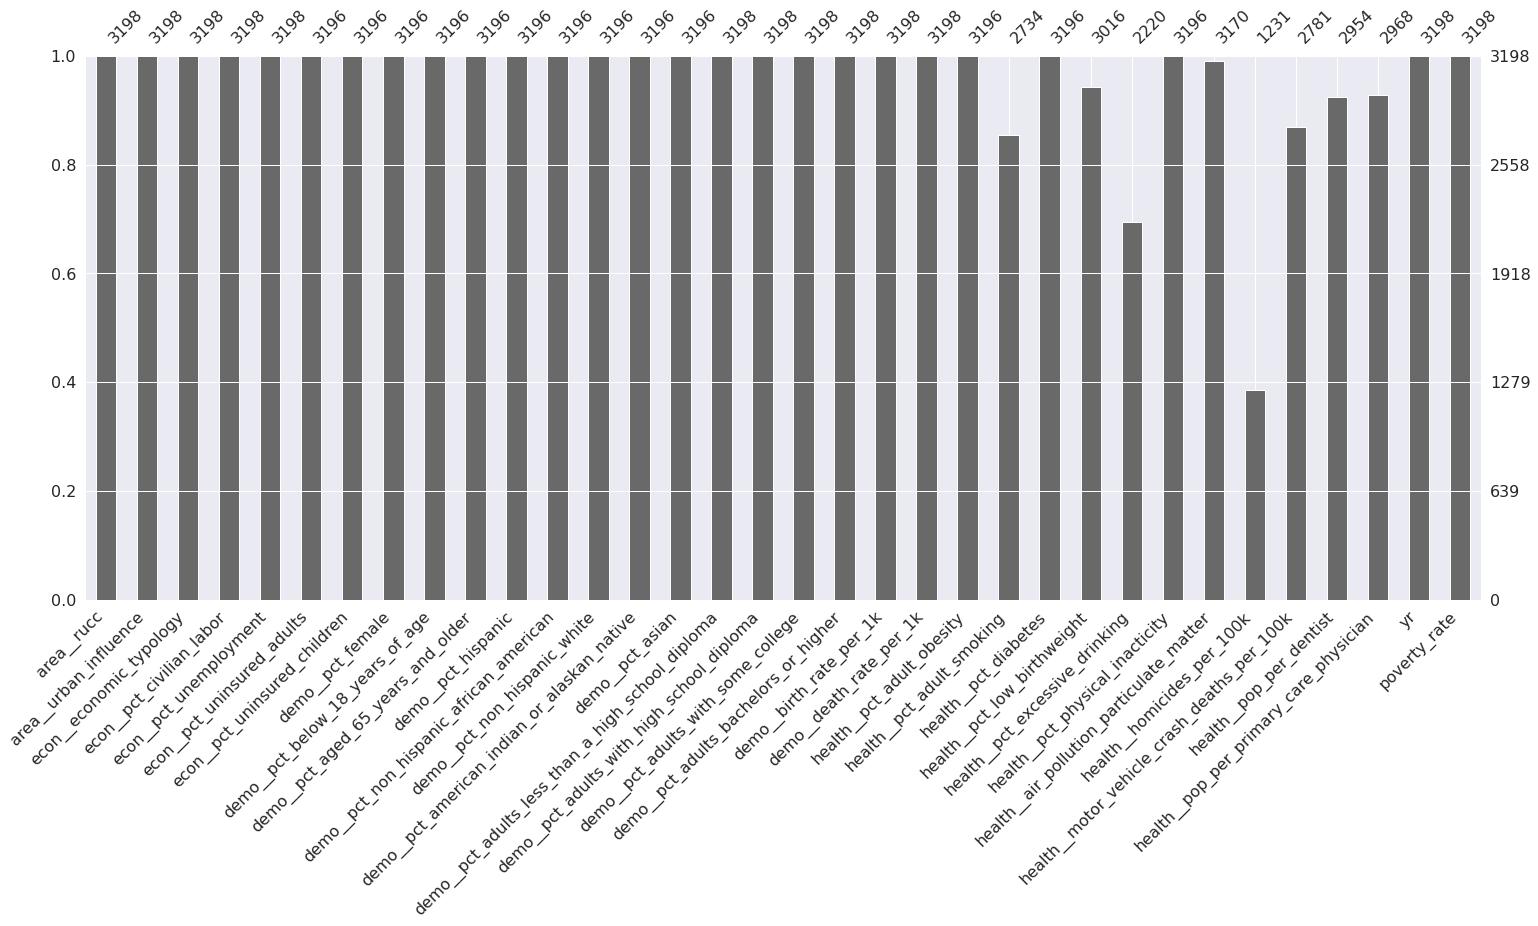

In [ ]:
# Generating the missing data report
msno.bar(df)

* columns health__pct_excessive_drinking and health__homicides_per_100k have more than 20% missing data and will be dropped.


In [ ]:
# dropping columns that have more than 20% missing data
df = df.drop(['health__pct_excessive_drinking','health__homicides_per_100k'], axis=1)

In [ ]:
#checking the median values of the columns
df.median()

<ipython-input-14-cce32674521b>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


econ__pct_civilian_labor                               0.467000
econ__pct_unemployment                                 0.057000
econ__pct_uninsured_adults                             0.216000
econ__pct_uninsured_children                           0.077000
demo__pct_female                                       0.503000
demo__pct_below_18_years_of_age                        0.226000
demo__pct_aged_65_years_and_older                      0.167000
demo__pct_hispanic                                     0.035000
demo__pct_non_hispanic_african_american                0.022000
demo__pct_non_hispanic_white                           0.854000
demo__pct_american_indian_or_alaskan_native            0.007000
demo__pct_asian                                        0.007000
demo__pct_adults_less_than_a_high_school_diploma       0.133501
demo__pct_adults_with_high_school_diploma              0.355701
demo__pct_adults_with_some_college                     0.301595
demo__pct_adults_bachelors_or_higher    

In [ ]:
#replacing the rest of the missing values with column medians
df.fillna(df.median(numeric_only=True).round(6), inplace=True)


In [ ]:
# check to see new stats on the dataframe after filling missing values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
econ__pct_civilian_labor,3198.0,0.467071,0.074541,0.217000,0.420000,0.467000,0.514000,1.000000
econ__pct_unemployment,3198.0,0.059610,0.022850,0.008000,0.044000,0.057000,0.071000,0.240000
econ__pct_uninsured_adults,3198.0,0.217533,0.067351,0.046000,0.166250,0.216000,0.262000,0.495000
econ__pct_uninsured_children,3198.0,0.085915,0.039993,0.009000,0.057000,0.077000,0.105000,0.285000
demo__pct_female,3198.0,0.498783,0.024243,0.294000,0.493000,0.503000,0.512000,0.576000
demo__pct_below_18_years_of_age,3198.0,0.227762,0.034280,0.098000,0.207000,0.226000,0.245000,0.417000
demo__pct_aged_65_years_and_older,3198.0,0.170135,0.043580,0.043000,0.142000,0.167000,0.194000,0.355000
demo__pct_hispanic,3198.0,0.090199,0.142669,0.000000,0.019000,0.035000,0.088000,0.945000
demo__pct_non_hispanic_african_american,3198.0,0.091073,0.147068,0.000000,0.006000,0.022000,0.096000,0.855000
demo__pct_non_hispanic_white,3198.0,0.770260,0.207849,0.060000,0.648250,0.854000,0.936000,0.998000


#### UNIVARIANT ANALYSIS

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
    

Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area                         608
Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area    484
Metro - Counties in metro areas of 1 million population or more                                  436
Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area                     418
Metro - Counties in metro areas of 250,000 to 1 million population                               370
Metro - Counties in metro areas of fewer than 250,000 population                                 322
Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area        238
Nonmetro - Urban population of 20,000 or more, adjacent to a metro area                          222
Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area                      100
Name: area__rucc, dtype: int64

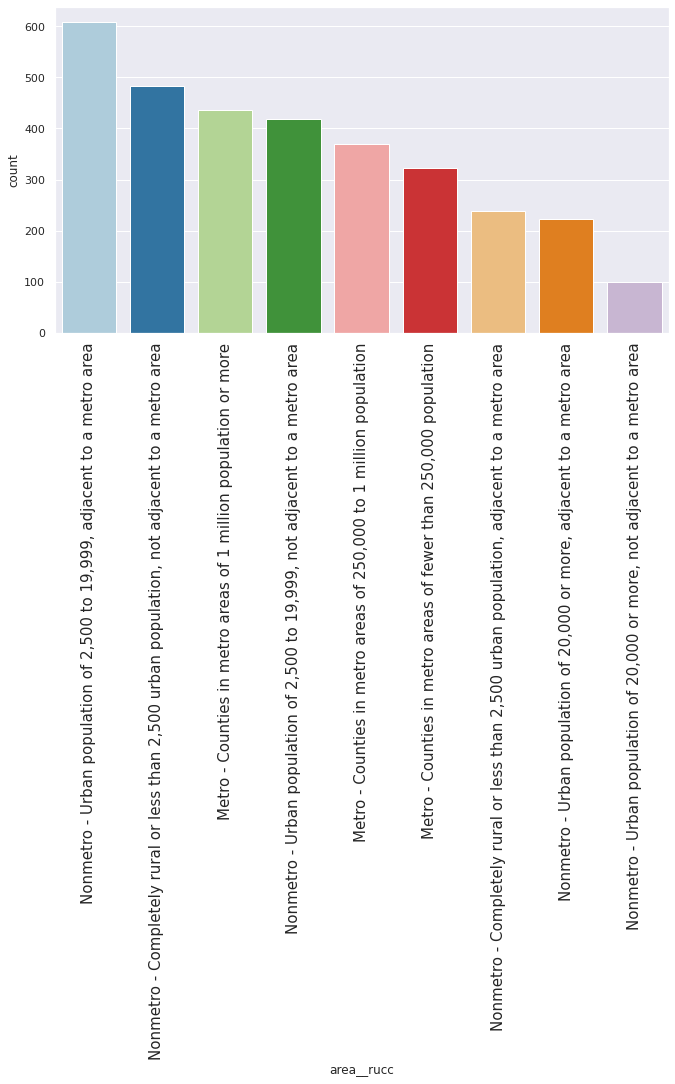

In [ ]:
# labeled bar plots for catergorical variables
labeled_barplot(df,"area__rucc")
df["area__rucc"].value_counts()

* There are 9 value/category in area_rucc
* Approximately 34% of the dataset are Metro counties and 66% are Nonmetro counties

Small-in a metro area with fewer than 1 million residents                                             692
Large-in a metro area with at least 1 million residents or more                                       436
Noncore adjacent to a small metro with town of at least 2,500 residents                               346
Micropolitan adjacent to a small metro area                                                           262
Micropolitan not adjacent to a metro area                                                             254
Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents    210
Noncore adjacent to micro area and does not contain a town of at least 2,500 residents                210
Noncore adjacent to micro area and contains a town of 2,500-19,999 residents                          206
Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents             176
Noncore adjacent to a large metro area        

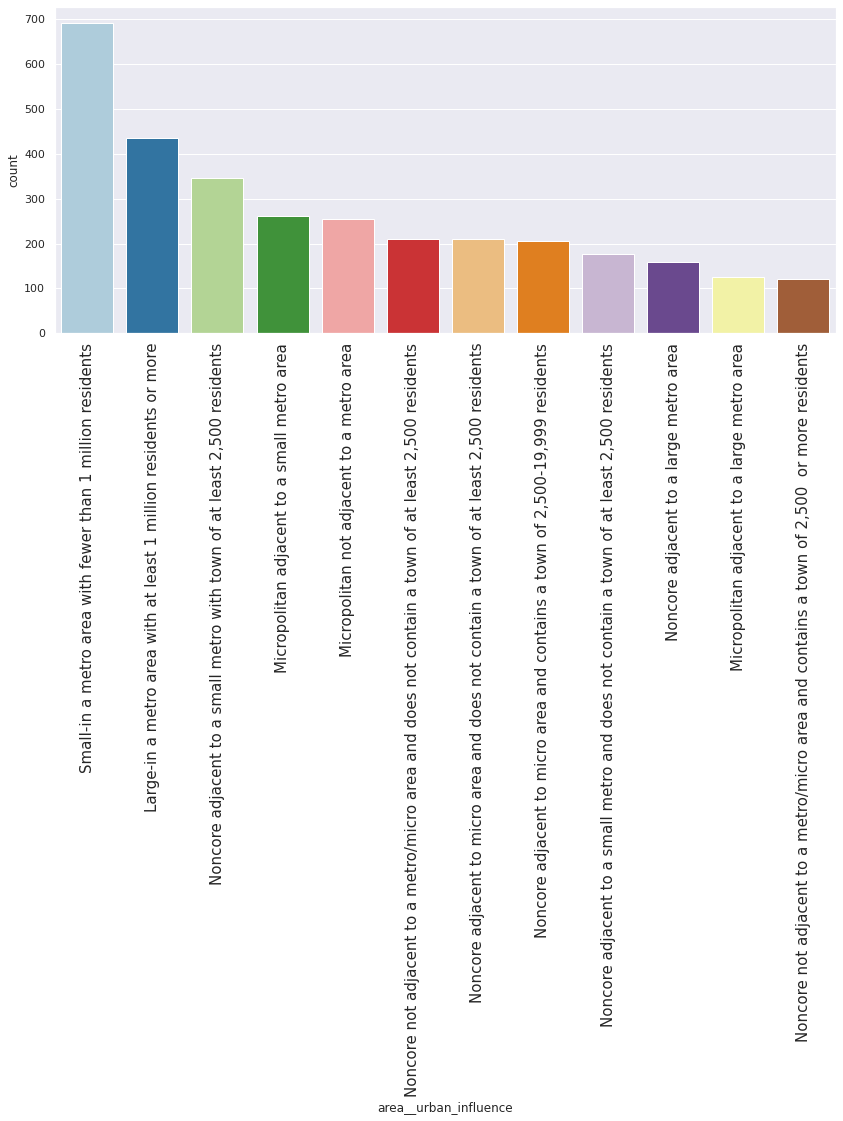

In [ ]:
labeled_barplot(df,"area__urban_influence")
df["area__urban_influence"].value_counts()

* There are 12 value/category in area_urban_influence

Nonspecialized                        1266
Manufacturing-dependent                494
Farm-dependent                         482
Federal/State government-dependent     390
Recreation                             312
Mining-dependent                       254
Name: econ__economic_typology, dtype: int64

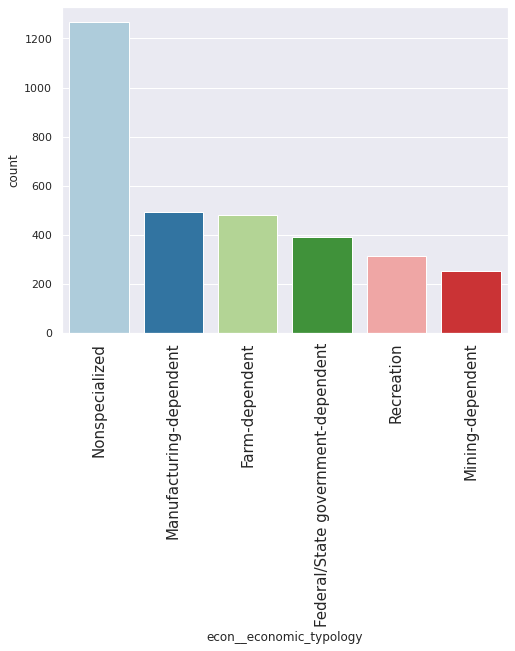

In [ ]:
labeled_barplot(df,"econ__economic_typology")
df['econ__economic_typology'].value_counts()

* There are 6 value/category in econ_economic_typology
* Approximately 40% of the counties are Non-specialized
* 15% of the counties are Manufacturing dependent and 15% are Farming dependent

b    1599
a    1599
Name: yr, dtype: int64

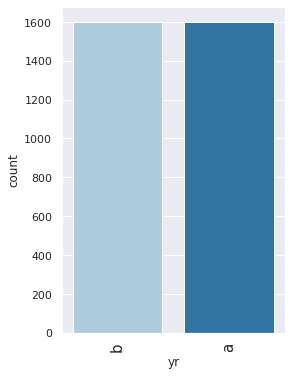

In [ ]:
labeled_barplot(df,"yr")
df['yr'].value_counts()

*  Half the data is for year "a" and half is for year "b"

In [ ]:
# function to creat histogram_boxplot
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<ipython-input-22-9b4acf9f2907>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f2, (ax_box2, ax_hist2) = plt.subplots(


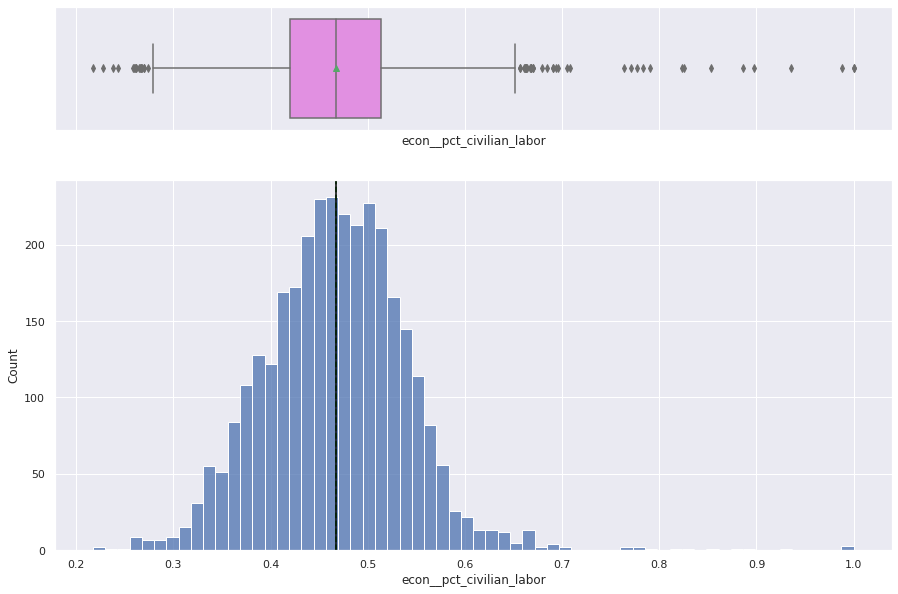

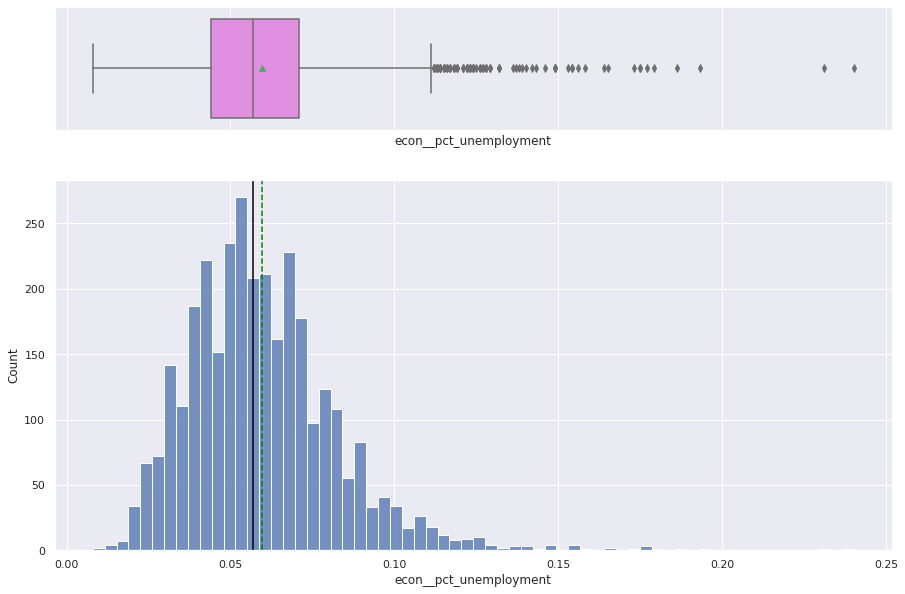

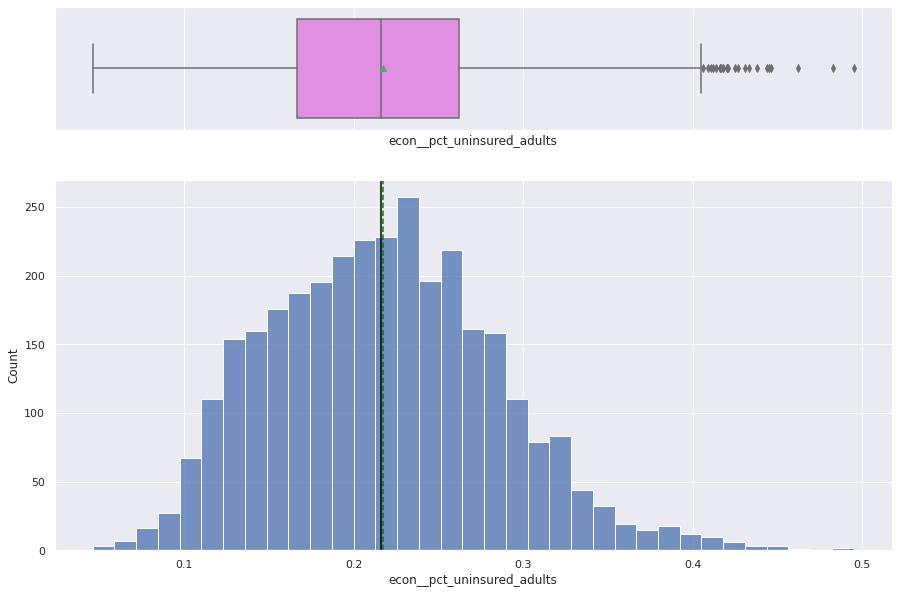

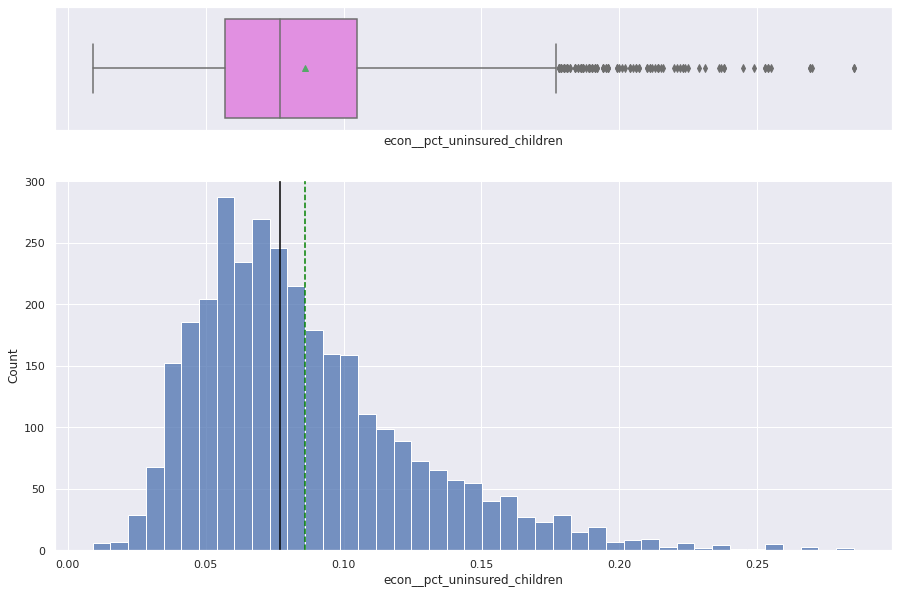

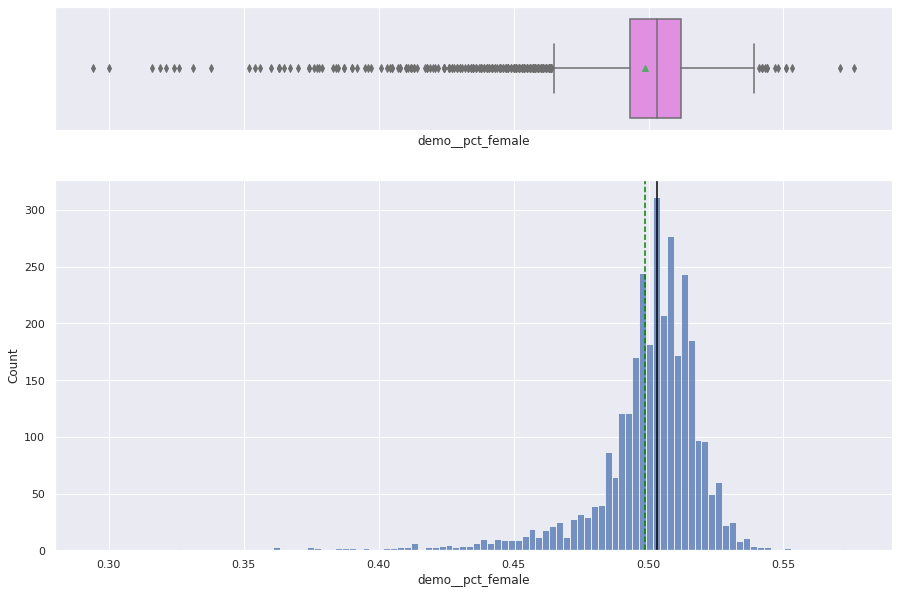

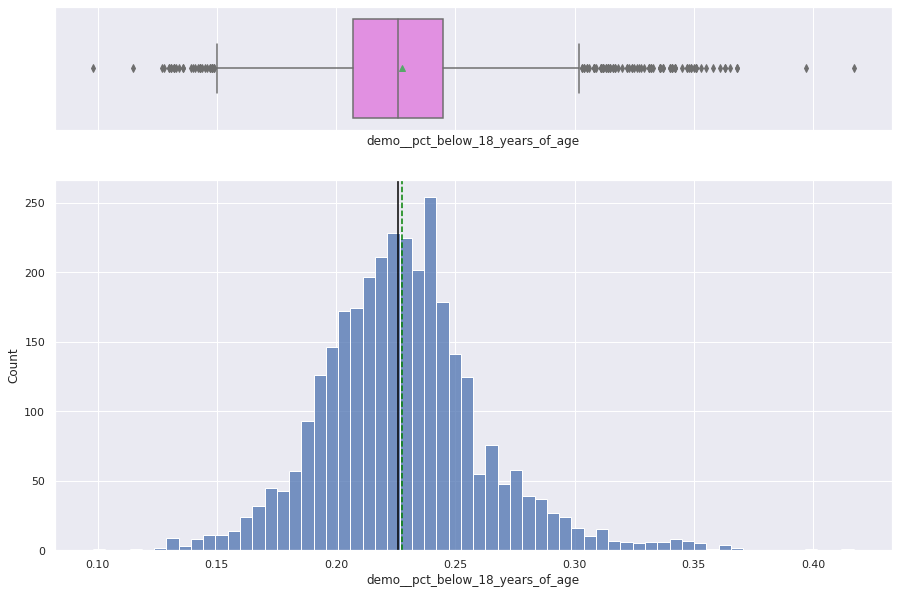

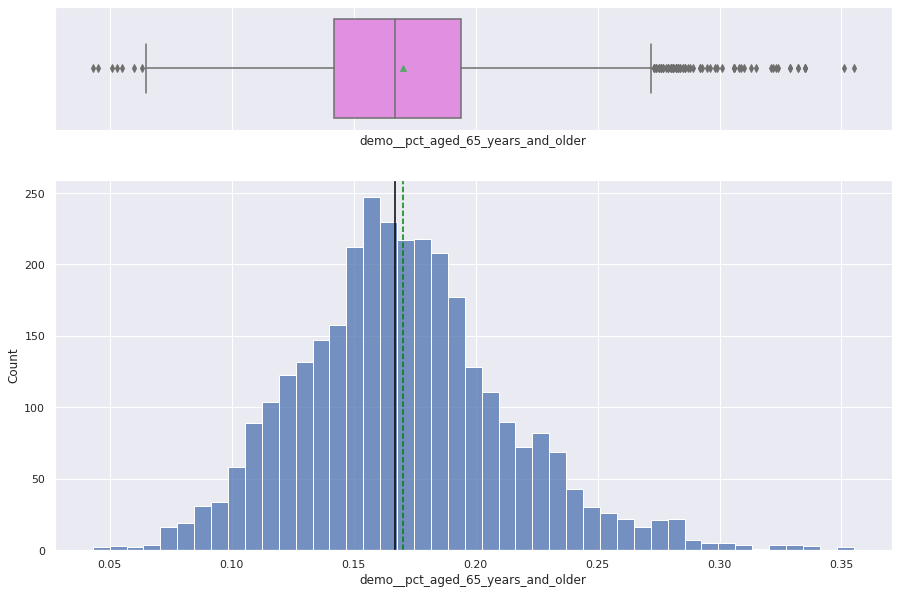

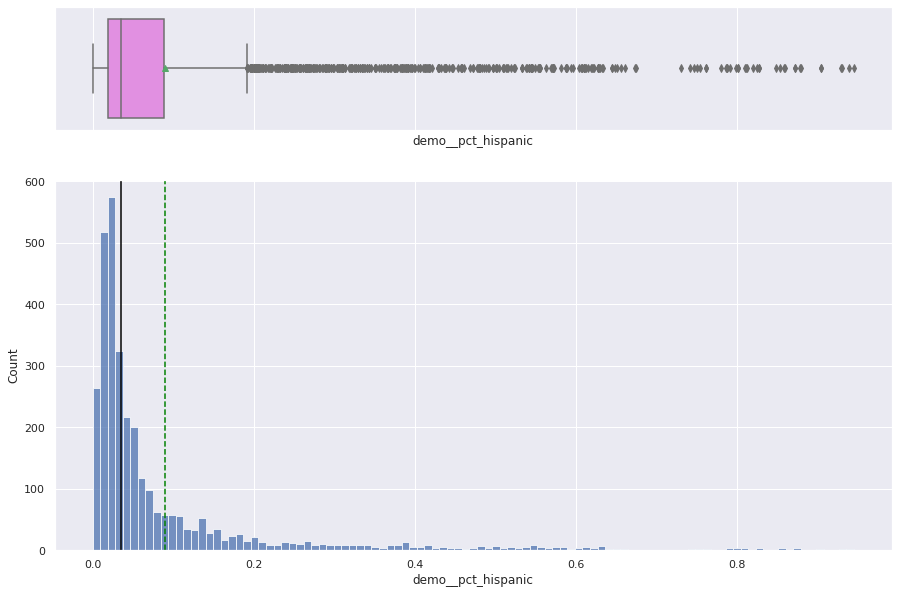

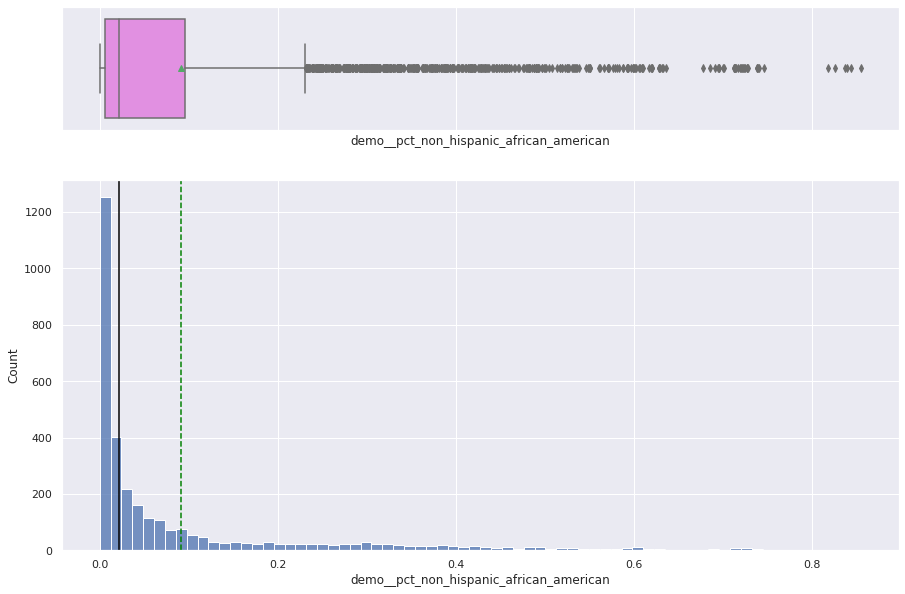

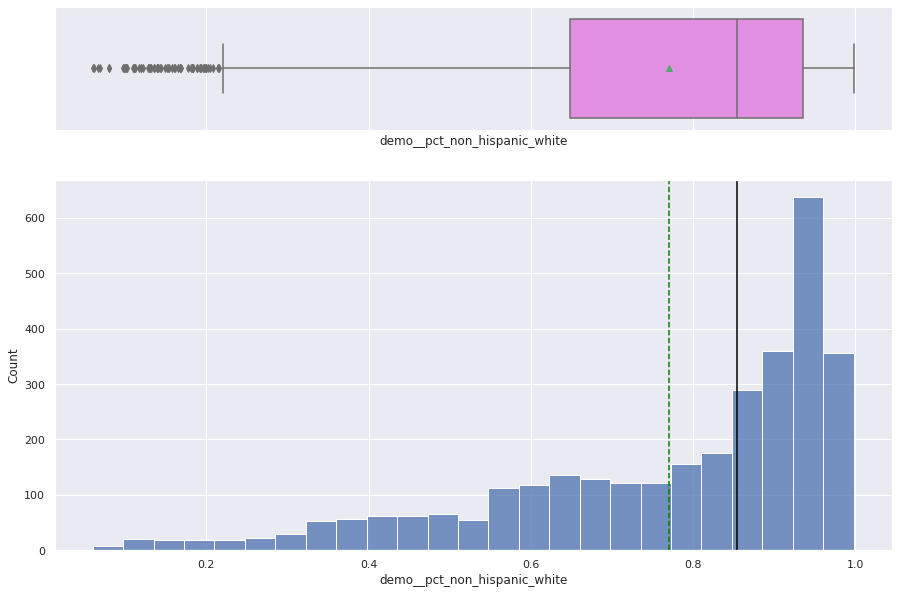

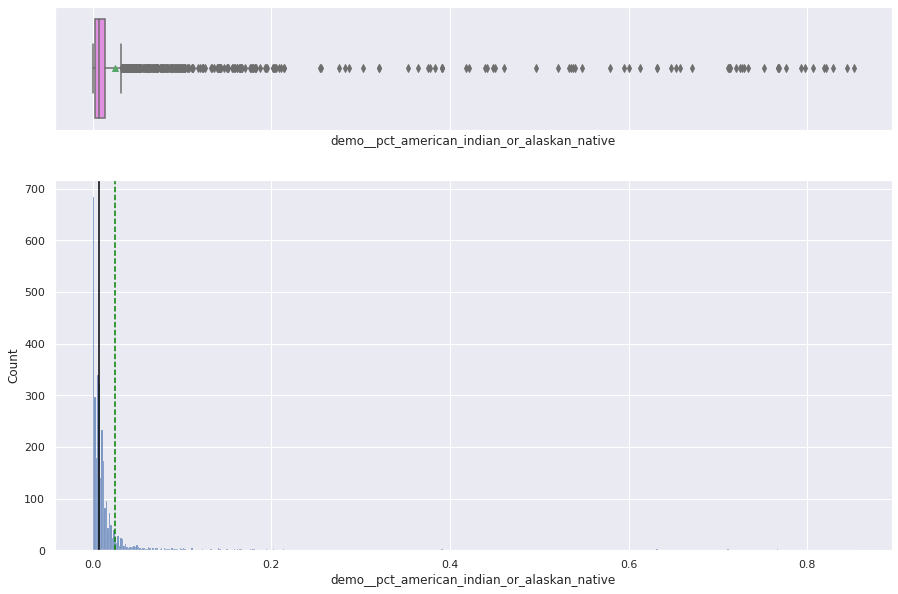

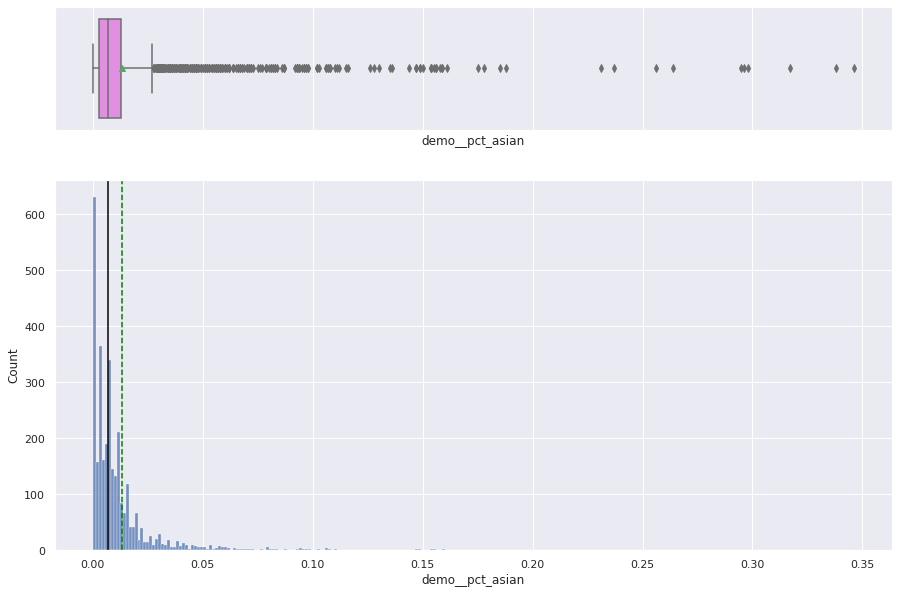

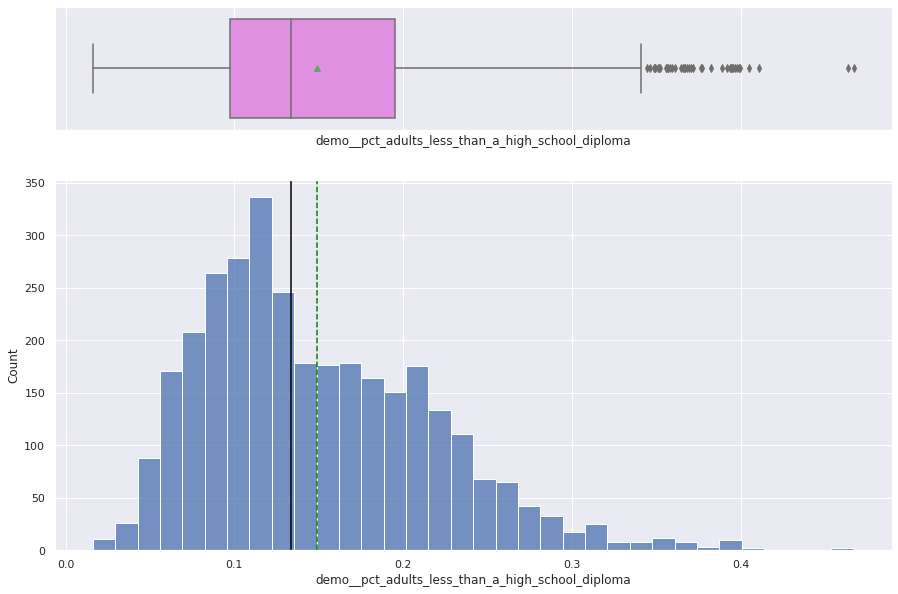

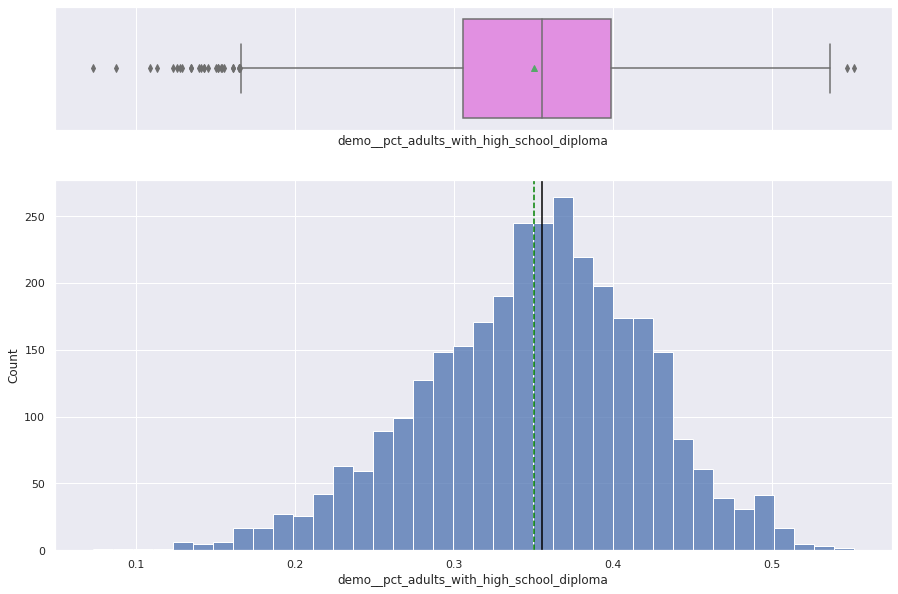

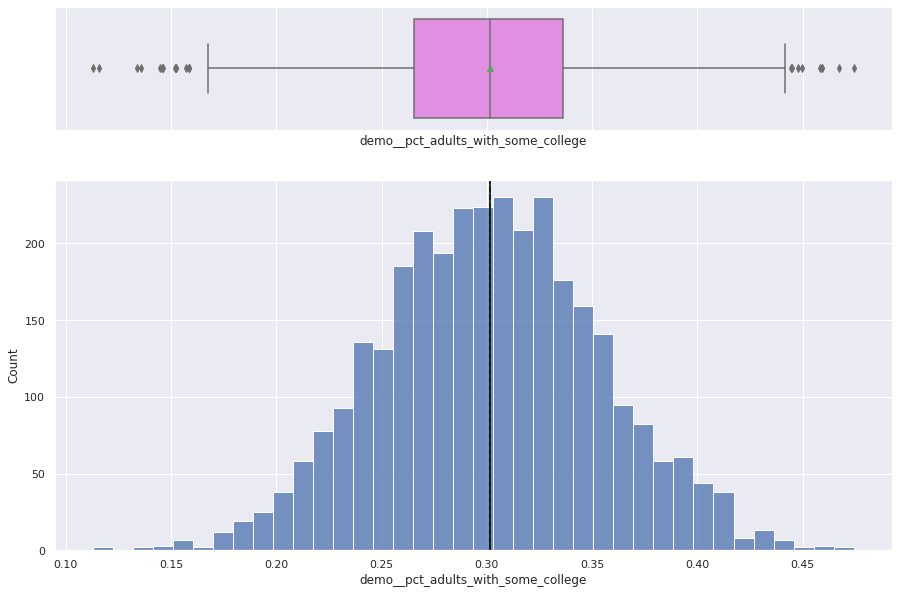

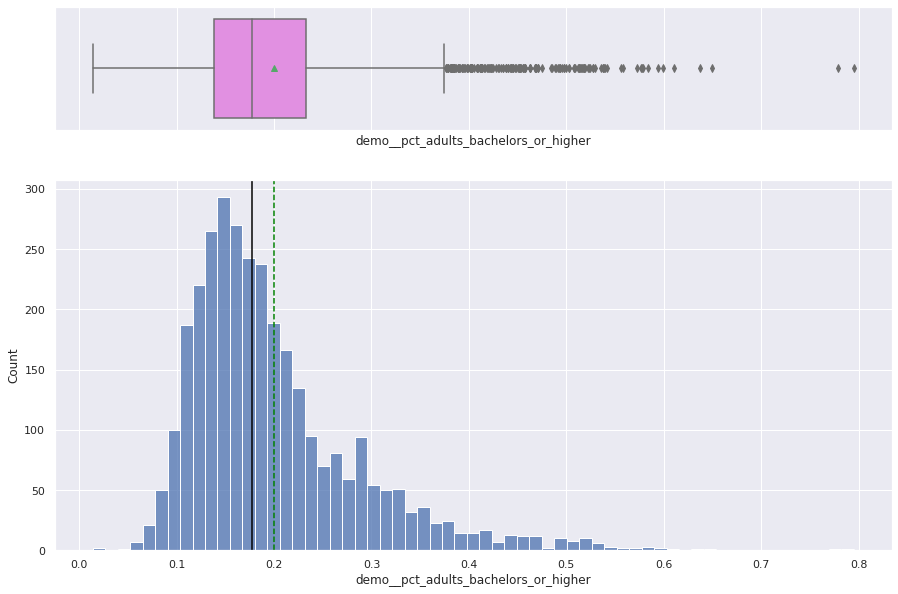

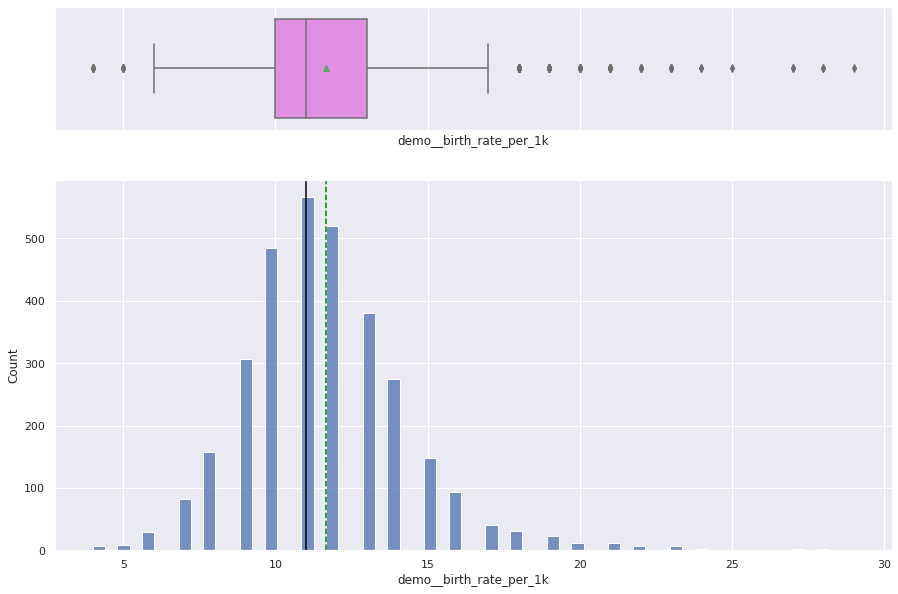

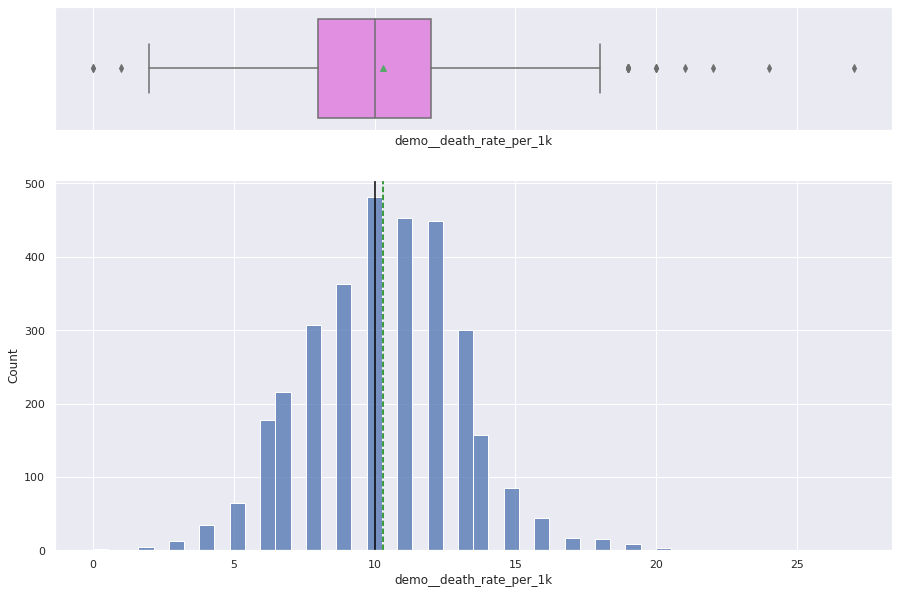

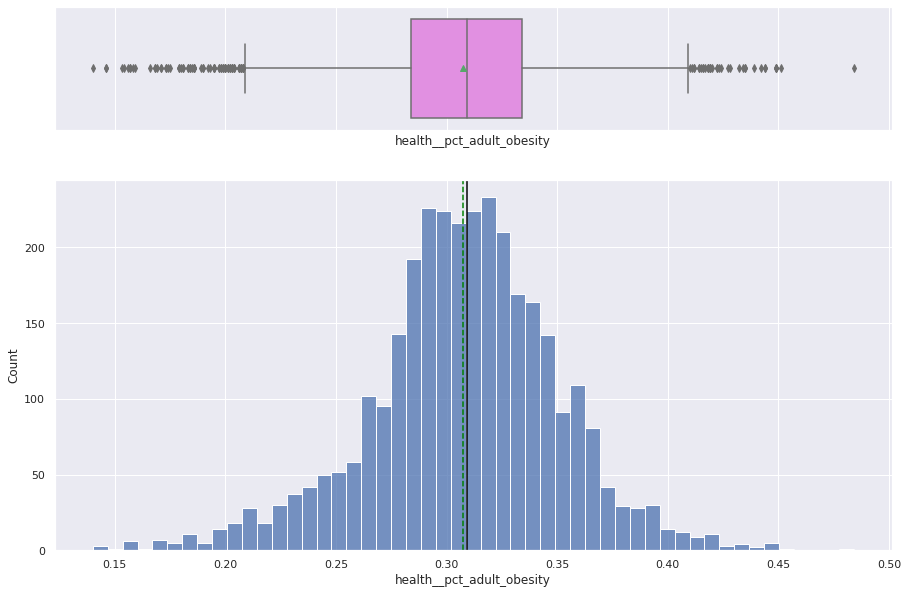

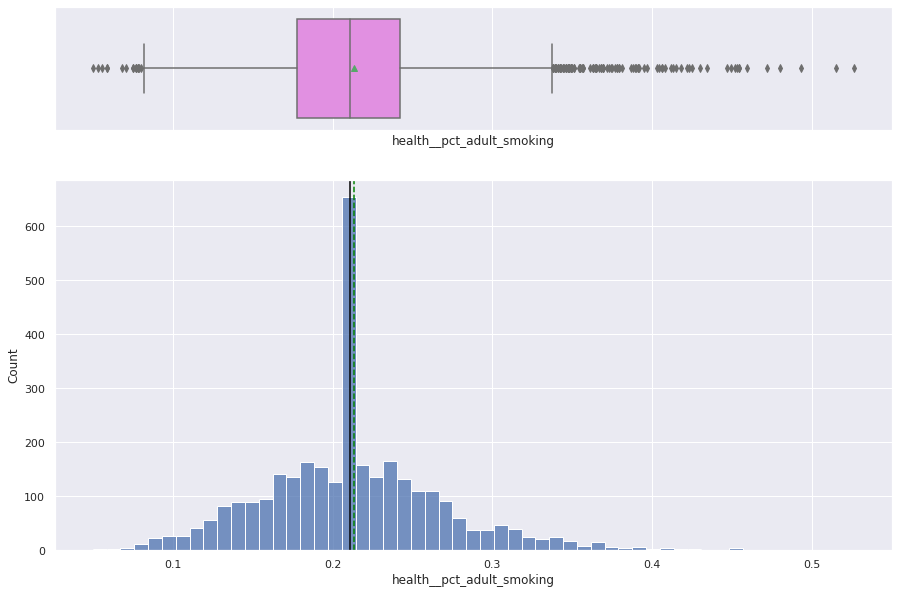

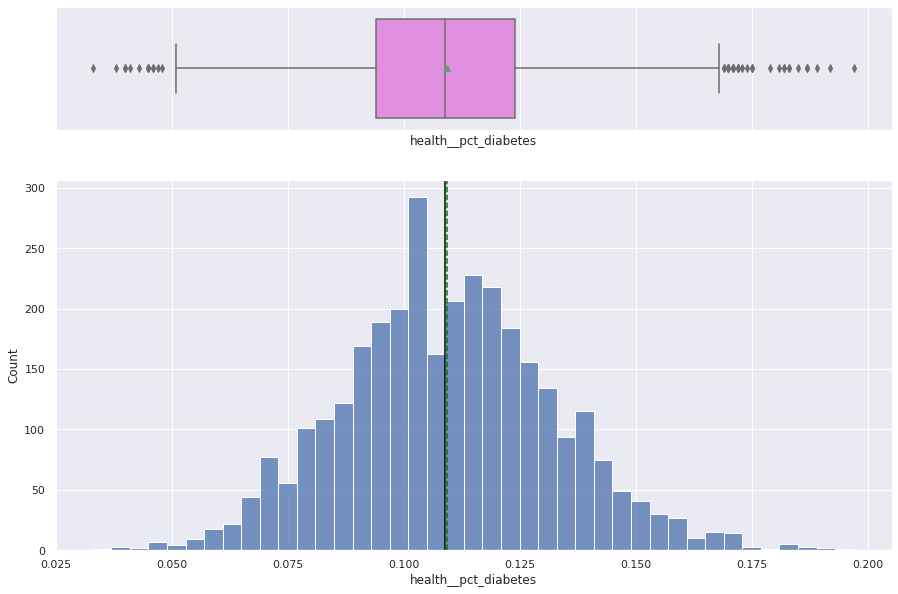

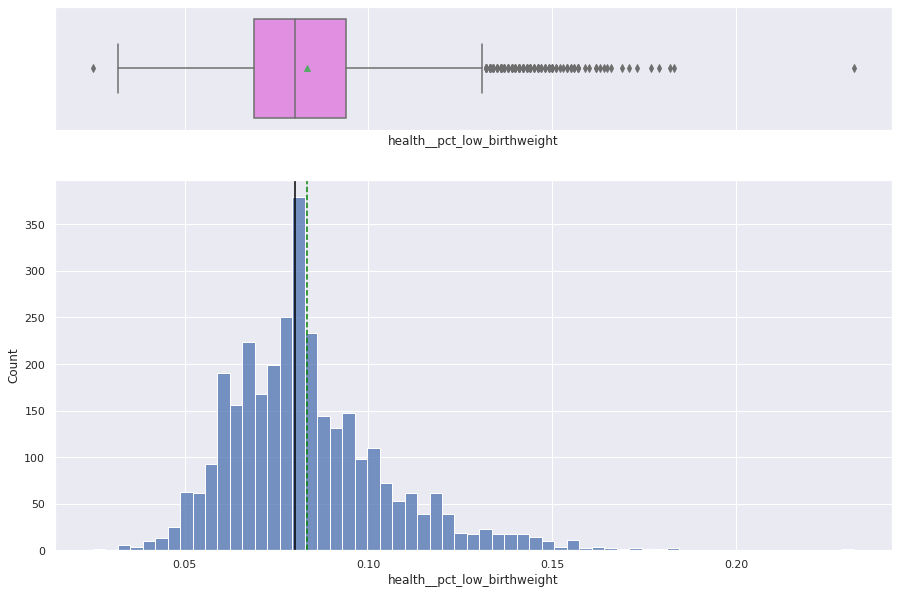

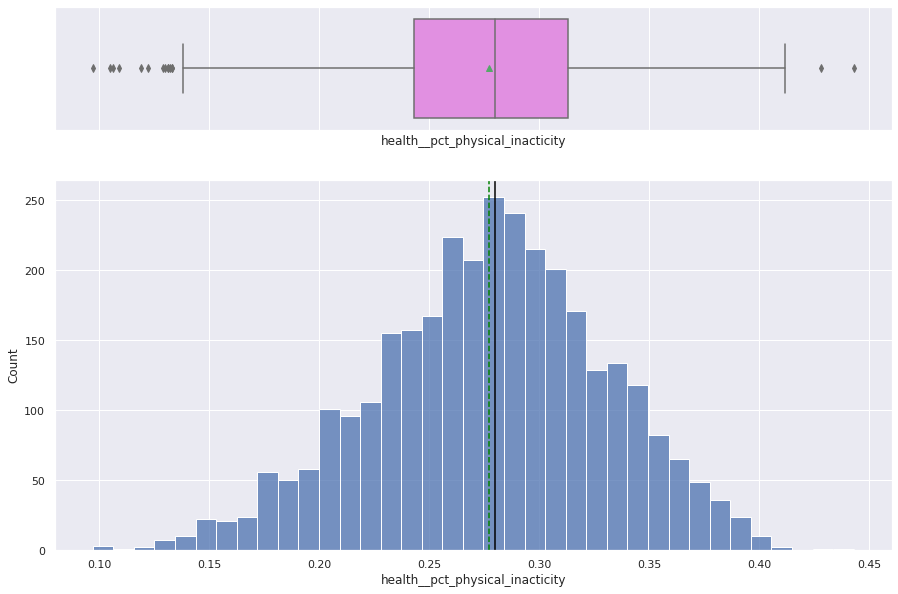

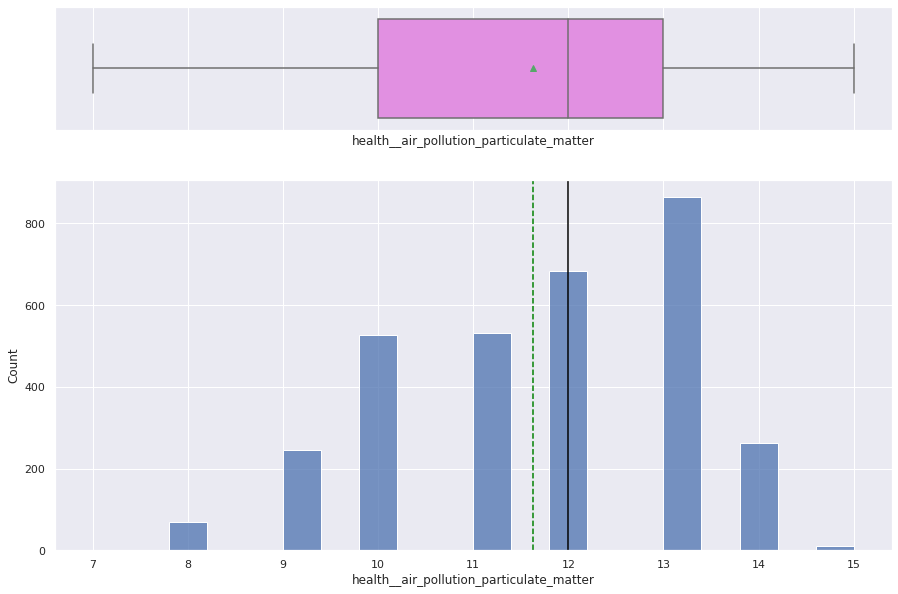

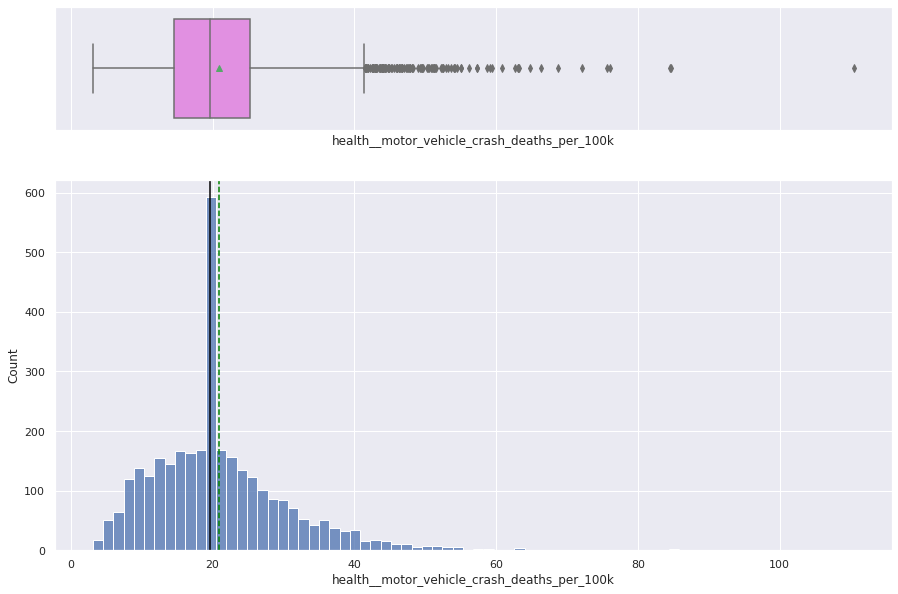

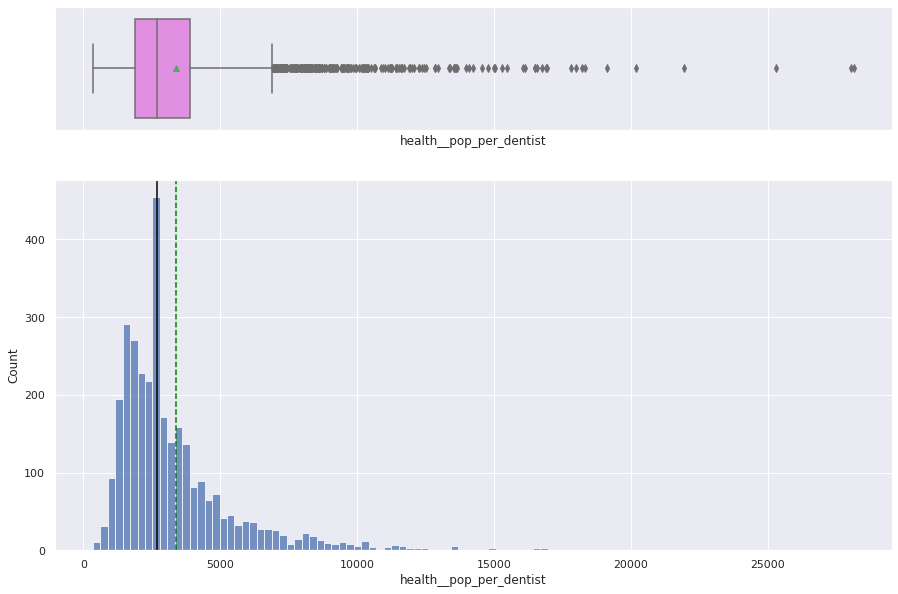

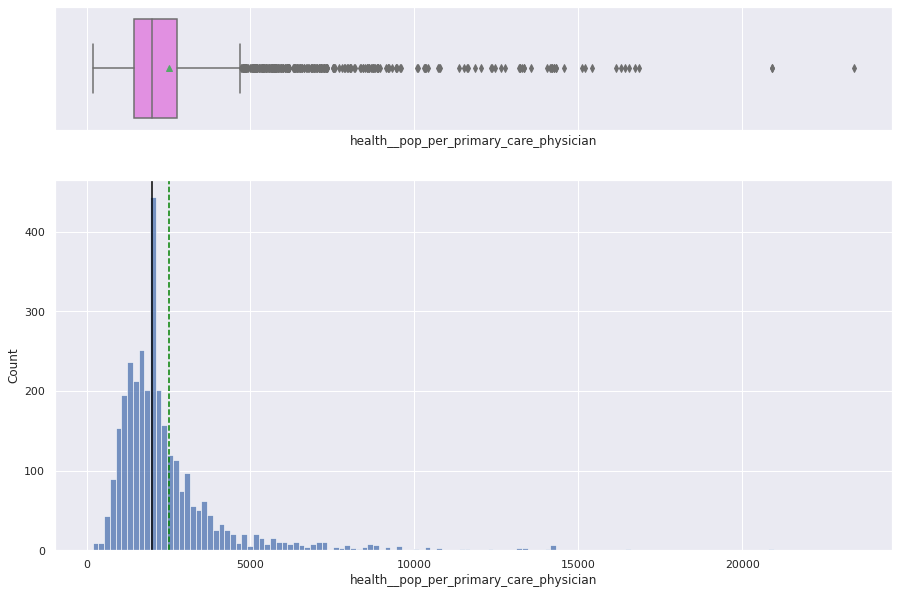

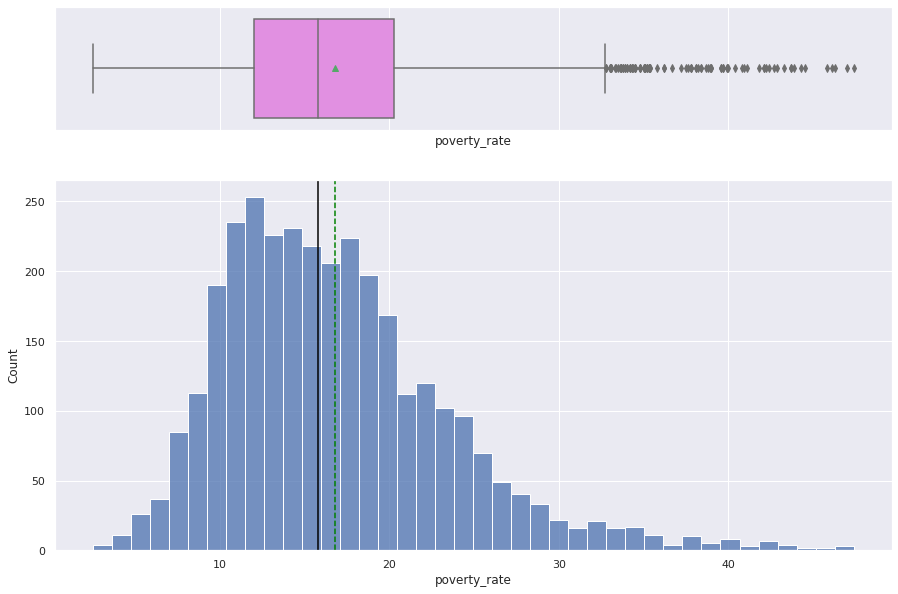

In [ ]:
num_cols=df.select_dtypes(include=np.number).columns.tolist()
for i in num_cols:
  histogram_boxplot(df, i)


# Observations on Numerical Columns in Data Set

* econ__pct_civilian_labor is normally distributed with outliers to both to the upside and down side
* econ__pct_unemployment has slight right skew with many outliers to the upside
* econ__pct_uninsured_adults is normally distribued with outliers to the upside
* econ__pct_uninsured_children has a slight right skew with many upside outliers
* demo__pct_female is left skewed with some outliers to upside and many outliers to the downside
* demo__pct_below_18_years_of_age is normally distributed with outliers on downside and upside (more on the upside)
* demo__pct_aged_65_years_and_older is normally distributed with outliers on downside and upsisde (more on the upside)
* demo__pct_hispanic has a major right skew with many outliers to the upside
* demo__pct_non_hispanic_african_american has a major right skew with many outliers to the upside
* demo__pct_non_hispanic_white has a major left skew with many outliers to the downside
* demo__pct_american_indian_or_alaskan_native has a major right skew with many outliers to the upside
* demo__pct_asian has a major right skew with many outliers to the upside
* demo__pct_adults_less_than_a_high_school_diploma has a slight rigt skew with outliers to the upside
* demo__pct_adults_with_high_school_diploma has a slight left skew with many outliers to the downside then the upside
* demo__pct_adults_with_some_college is normally distributed with equal number of outliers to the downside and upside
* demo__pct_adults_bachelors_or_higher has a slight right skew with outliers only to the upside
* demo__birth_rate_per_1k has a slight right skew with many more outliers to the upside then the downside
* demo__death_rate_per_1k is normally distributed with more outliers to the upside then the downside
* health__pct_adult_obesity is normally distributed with outliers to both the upside and the downside
* health__pct_adult_smoking is normally distributed with many more outliers to the upside then the downside. The count of the counties at the mean is considerably higher then count of counties away from the mean.
* health__pct_diabetes is normally distributed with outliers to the upside and downside
* health__pct_low_birthweight has a slight right skew with many outliers to the upside
* health__pct_physical_inacticity has a slight left skew with no outliers
* health__air_pollution_particulate_matter has a slight left skew with no outliers
* health__motor_vehicle_crash_deaths_per_100k has a slight right skew with many outliers to the upside. The count of the counties at the median is considerably higher then count of counties away from the median.
* health__pop_per_dentist has a right skew with many outliers to the upside. The count of the counties at the median is considerably higher then count of counties away from the median.
* health__pop_per_primary_care_physician has a right skew with many outliers to the upside. The count of the counties at the median is considerably higher then count of counties away from the median.
* poverty_rate has a right skew with many outliers to the upside

#### BIVARIANT ANALYSIS

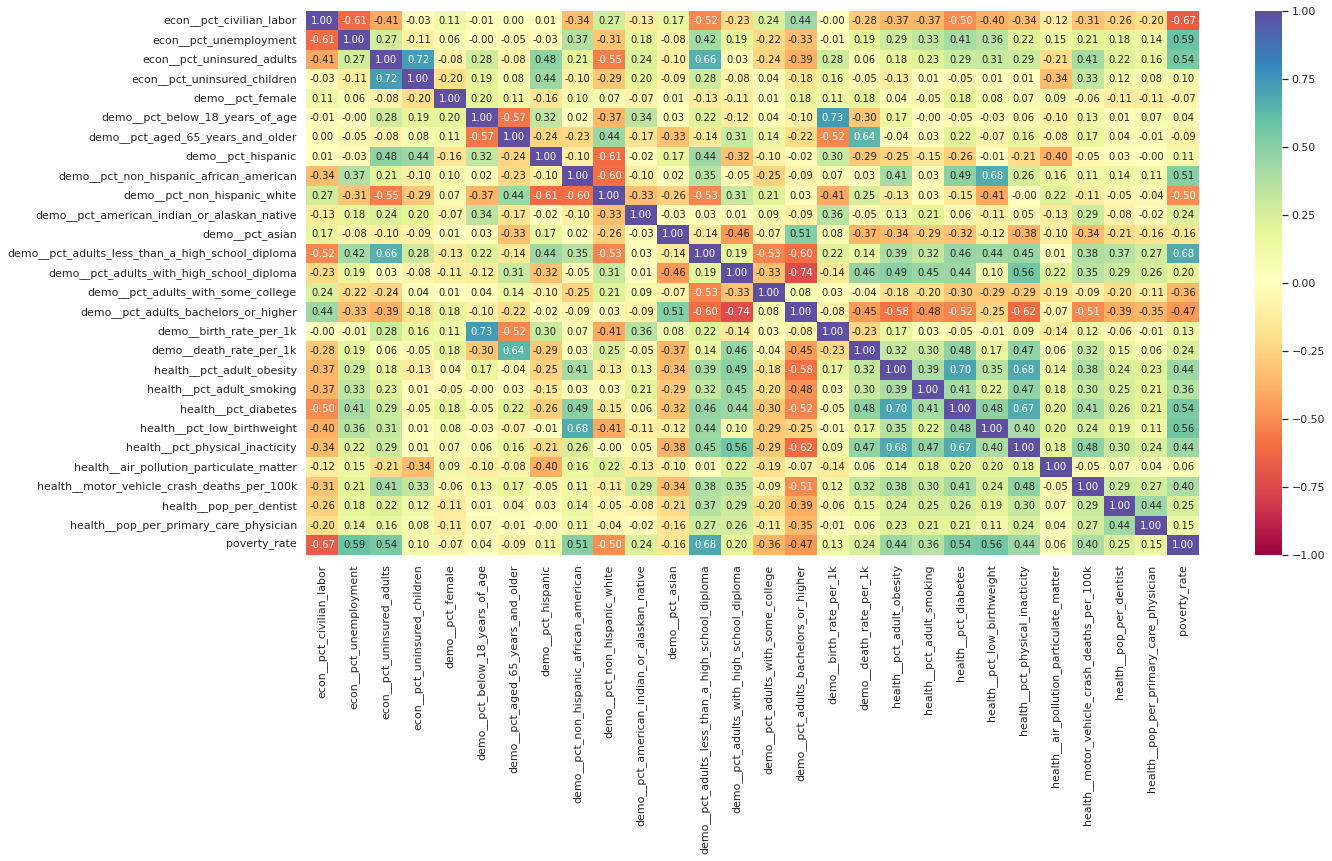

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

# Bivariant analysis of various categories to poverty_rate
* demo__pct_adults_less_than_a_high_school_diploma has the highest positive correlation to poverty rate at 0.68
* econ__pct_civilian_labor has the highest negative correlation to poverty rate at -0.67
* econ__pct_unemployment, econ__pct_uninsured_adults, demo__pct_non_hispanic_african_american, health__pct_adult_obesity, health__pct_adult_smoking, health__pct_diabetes, health__pct_low_birthweight, health__pct_physical_inacticity, health__motor_vehicle_crash_deaths_per_100k all have medium to high positive correlation to poverty_rate
* demo__pct_non_hispanic_white, demo__pct_adults_with_some_college, demo__pct_adults_bachelors_or_higher all have medium to high negative correlation to poverty rate

## Strong Positive Correlations Between Categories
* econ__pct_uninsured_adults has strong positive correlation to econ__pct_uninsured_children and demo__pct_adults_less_than_a_high_school_diploma
* demo__pct_below_18_years_of_age has strong positive correlation to demo__birth_rate_per_1k
* demo__pct_aged_65_years_and_older has strong positive correlation to demo__death_rate_per_1k
* demo__pct_non_hispanic_african_american has strong positive correlation to health__pct_low_birthweight
* demo__pct_adults_with_high_school_diploma has strong positive correlation to health__pct_physical_inacticity
* health__pct_adult_obesity has strong positive correlations to health__pct_diabetes and health__pct_physical_inacticity
* health__pct_diabetes has strong positive correlation to health__pct_physical_inacticity


## Strong Negative Correlations Between 

* econ__pct_civilian_labor has strong negative correlation to econ__pct_unemployment and demo__pct_adults_less_than_a_high_school_diploma
* econ__pct_uninsured_adults has strong negative correlation to demo__pct_non_hispanic_white
* demo__pct_below_18_years_of_age has strong negative correlation to demo__pct_aged_65_years_and_older
* demo__pct_aged_65_years_and_older has strong negative correlation to demo__birth_rate_per_1k
* demo__pct_hispanic has strong negative correlation to demo__pct_non_hispanic_white
* demo__pct_non_hispanic_african_american has strong negative correlation to demo__pct_non_hispanic_white
* demo__pct_adults_less_than_a_high_school_diploma has strong negative correlation to demo__pct_adults_with_some_college and demo__pct_adults_bachelors_or_higher
* demo__pct_adults_with_high_school_diploma has strong negative correlation to demo__pct_adults_bachelors_or_higher
* demo__pct_adults_bachelors_or_higher has strong negative correlation to health__pct_adult_obesity, health__pct_diabetes, health__pct_physical_inacticity, and health__motor_vehicle_crash_deaths_per_100k



#### Linear Regression

In [ ]:
# defining X and y variables
X = df.drop(["poverty_rate"], axis=1)
y = df["poverty_rate"]


In [ ]:
# add the intercept to data
X = sm.add_constant(X)

In [ ]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,...,"area__urban_influence_Noncore adjacent to micro area and does not contain a town of at least 2,500 residents","area__urban_influence_Noncore not adjacent to a metro/micro area and contains a town of 2,500 or more residents","area__urban_influence_Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",area__urban_influence_Small-in a metro area with fewer than 1 million residents,econ__economic_typology_Federal/State government-dependent,econ__economic_typology_Manufacturing-dependent,econ__economic_typology_Mining-dependent,econ__economic_typology_Nonspecialized,econ__economic_typology_Recreation,yr_b
0,1.0,0.358,0.089,0.253,0.099,0.494,0.200,0.195,0.044,0.517,...,0,0,0,0,1,0,0,0,0,1
1,1.0,0.503,0.057,0.171,0.065,0.503,0.243,0.166,0.017,0.016,...,0,0,0,0,0,1,0,0,0,1
2,1.0,0.471,0.070,0.297,0.122,0.497,0.250,0.178,0.554,0.002,...,0,0,0,0,1,0,0,0,0,1
3,1.0,0.578,0.049,0.231,0.107,0.474,0.194,0.196,0.031,0.002,...,0,0,0,0,1,0,0,0,0,1
4,1.0,0.530,0.046,0.262,0.067,0.513,0.206,0.101,0.433,0.096,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:           poverty_rate   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     172.0
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:19:29   Log-Likelihood:                -5674.9
No. Observations:                2238   AIC:                         1.145e+04
Df Residuals:                    2189   BIC:                         1.173e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------

## Model Performance Check

* Will use metric functions defined in sklearn for RMSE, MAE, and R2 and define a function to calculate MAPE and adjusted R2

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
#  model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.054906,2.311275,0.790433,0.785347,15.356605


In [ ]:
# checking model performance on test set (unseen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.321671,2.413797,0.757889,0.743726,15.528418


### Observations On Initial Model
* The r-squared for the training and test are comparable at 0.79 and 0.76, respectively,meaning that the model is not underfitting.
* The RMSE and MAE are also comparable showing that the model is not overfitting
* The MAE of 2.41 in the Test set shows that the model can predict the poverty_rate with a mean error of 2.41
* The MAPE score of 15.52 on the test data shows we can predict the poverty_rate with 15.52% of the actual poverty_rate

## TEST FOR MULTICOLLINEARITY

In [ ]:
# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)

/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,const,0.000000e+00
1,econ__pct_civilian_labor,2.478361e+00
2,econ__pct_unemployment,2.326261e+00
3,econ__pct_uninsured_adults,6.141333e+00
4,econ__pct_uninsured_children,4.520173e+00
5,demo__pct_female,2.142813e+00
6,demo__pct_below_18_years_of_age,3.970674e+00
7,demo__pct_aged_65_years_and_older,5.928115e+00
8,demo__pct_hispanic,8.581605e+01
9,demo__pct_non_hispanic_african_american,8.986852e+01


## REMOVING FOR MULTICOLLINEARITY
  * Not removing VIF >5 for constant and dummy variables

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ["econ__pct_uninsured_adults", "demo__pct_aged_65_years_and_older","demo__pct_hispanic","demo__pct_non_hispanic_african_american","demo__pct_non_hispanic_white","demo__pct_american_indian_or_alaskan_native",
            "demo__pct_asian","demo__pct_adults_less_than_a_high_school_diploma","demo__pct_adults_with_high_school_diploma","demo__pct_adults_with_some_college","demo__pct_adults_bachelors_or_higher"]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,demo__pct_asian,0.785896,3.088485
1,demo__pct_adults_less_than_a_high_school_diploma,0.785830,3.088965
2,demo__pct_adults_with_high_school_diploma,0.785830,3.088965
3,demo__pct_adults_with_some_college,0.785830,3.088965
4,demo__pct_adults_bachelors_or_higher,0.785830,3.088965
5,demo__pct_non_hispanic_white,0.785771,3.089389
6,demo__pct_hispanic,0.785650,3.090262
7,demo__pct_non_hispanic_african_american,0.784871,3.095871
8,demo__pct_american_indian_or_alaskan_native,0.783356,3.106749
9,demo__pct_aged_65_years_and_older,0.779846,3.131819


In [ ]:
col_to_drop = "demo__pct_adults_less_than_a_high_school_diploma"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]


# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF after dropping  demo__pct_adults_less_than_a_high_school_diploma


,feature,VIF
0,const,6311.026402
1,econ__pct_civilian_labor,2.478358
2,econ__pct_unemployment,2.325692
3,econ__pct_uninsured_adults,6.141257
4,econ__pct_uninsured_children,4.519837
5,demo__pct_female,2.142330
6,demo__pct_below_18_years_of_age,3.968873
7,demo__pct_aged_65_years_and_older,5.927549
8,demo__pct_hispanic,85.809139
9,demo__pct_non_hispanic_african_american,89.858784


In [ ]:
col_to_drop = "demo__pct_non_hispanic_white"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]


# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF after dropping  demo__pct_non_hispanic_white


,feature,VIF
0,const,1850.622225
1,econ__pct_civilian_labor,2.475391
2,econ__pct_unemployment,2.325691
3,econ__pct_uninsured_adults,6.115839
4,econ__pct_uninsured_children,4.515057
5,demo__pct_female,2.142330
6,demo__pct_below_18_years_of_age,3.953958
7,demo__pct_aged_65_years_and_older,5.902422
8,demo__pct_hispanic,3.459273
9,demo__pct_non_hispanic_african_american,3.252877


In [ ]:
col_to_drop = "demo__pct_adults_bachelors_or_higher"
x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)]
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)]


# Check VIF now
vif = checking_vif(x_train4)
print("VIF after dropping ", col_to_drop)
vif

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF after dropping  demo__pct_adults_bachelors_or_higher


,feature,VIF
0,const,1169.874907
1,econ__pct_civilian_labor,2.438623
2,econ__pct_unemployment,2.247413
3,econ__pct_uninsured_adults,5.665493
4,econ__pct_uninsured_children,4.478214
5,demo__pct_female,2.041280
6,demo__pct_below_18_years_of_age,3.938999
7,demo__pct_aged_65_years_and_older,5.899261
8,demo__pct_hispanic,2.836634
9,demo__pct_non_hispanic_african_american,3.248811


In [ ]:
col_to_drop = "demo__pct_aged_65_years_and_older"
x_train5 = x_train4.loc[:, ~x_train4.columns.str.startswith(col_to_drop)]
x_test5 = x_test4.loc[:, ~x_test4.columns.str.startswith(col_to_drop)]


# Check VIF now
vif = checking_vif(x_train5)
print("VIF after dropping ", col_to_drop)
vif

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF after dropping  demo__pct_aged_65_years_and_older


,feature,VIF
0,const,1156.689961
1,econ__pct_civilian_labor,2.425425
2,econ__pct_unemployment,2.246970
3,econ__pct_uninsured_adults,5.612680
4,econ__pct_uninsured_children,4.354182
5,demo__pct_female,1.805353
6,demo__pct_below_18_years_of_age,3.216373
7,demo__pct_hispanic,2.788283
8,demo__pct_non_hispanic_african_american,3.188366
9,demo__pct_american_indian_or_alaskan_native,1.790045


In [ ]:
col_to_drop = "econ__pct_uninsured_adults"
x_train6 = x_train5.loc[:, ~x_train5.columns.str.startswith(col_to_drop)]
x_test6 = x_test5.loc[:, ~x_test5.columns.str.startswith(col_to_drop)]


# Check VIF now
vif = checking_vif(x_train6)
print("VIF after dropping ", col_to_drop)
vif

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF after dropping  econ__pct_uninsured_adults


,feature,VIF
0,const,1156.603477
1,econ__pct_civilian_labor,2.290997
2,econ__pct_unemployment,2.211111
3,econ__pct_uninsured_children,1.989855
4,demo__pct_female,1.778964
5,demo__pct_below_18_years_of_age,3.209073
6,demo__pct_hispanic,2.501661
7,demo__pct_non_hispanic_african_american,3.165142
8,demo__pct_american_indian_or_alaskan_native,1.750219
9,demo__pct_asian,1.678195


In [ ]:
olsmod1 = sm.OLS(y_train, x_train6).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:           poverty_rate   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     149.4
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:54:58   Log-Likelihood:                -5873.0
No. Observations:                2238   AIC:                         1.184e+04
Df Residuals:                    2193   BIC:                         1.209e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [ ]:
#  model performance on train set after taking into account multicollinearity (seen 70% data)
print("Training Performance\n")
olsmodl_train_perf = model_performance_regression(olsmod1, x_train6, y_train)
olsmodl_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.337725,2.541955,0.749834,0.744348,17.566883


In [ ]:
#  model performance on test set after taking into account multicollinearity (unseen 30% data)
print("Testing Performance\n")
olsmodl_train_perf = model_performance_regression(olsmod1, x_test6, y_test)
olsmodl_train_perf

Testing Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.589625,2.630412,0.717252,0.702355,17.116844


### Observations On Model After Taking Into Account Multicollinarity
* The r-squared for the training and test are comparable at 0.74 and 0.70, respectively,meaning that the model is not underfitting.
* The RMSE and MAE are also comparable showing that the model is not overfitting
* The MAE of 2.63 in the Test set shows that the model can predict the poverty_rate with a mean error of 2.63
* The MAPE score of 17.12 on the test data shows we can predict the poverty_rate with 17.12% of the actual poverty_rate

#### Dealing with high p-value variables

* Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
* But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
* Instead, we will do the following:
  * Build a model, check the p-values of the variables, and drop the column with the highest p-value
  * Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
  * Repeat the above two steps till there are no columns with p-value > 0.05


In [ ]:
# initial list of columns
predictors = x_train6.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'econ__pct_civilian_labor', 'econ__pct_unemployment', 'demo__pct_below_18_years_of_age', 'demo__pct_hispanic', 'demo__pct_non_hispanic_african_american', 'demo__pct_american_indian_or_alaskan_native', 'demo__pct_adults_with_high_school_diploma', 'demo__pct_adults_with_some_college', 'demo__birth_rate_per_1k', 'health__pct_adult_obesity', 'health__pct_adult_smoking', 'health__pct_low_birthweight', 'health__pct_physical_inacticity', 'health__motor_vehicle_crash_deaths_per_100k', 'area__rucc_Metro - Counties in metro areas of 250,000 to 1 million population', 'area__rucc_Metro - Counties in metro areas of fewer than 250,000 population', 'area__rucc_Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area', 'area__rucc_Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area', 'area__rucc_Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area', 'area__rucc_Nonmetro - Urban population of 2,500 

In [ ]:
# we are creating a new datafram with the filtered column list of features that are significant
x_train7 = x_train6[selected_features]
x_test7 = x_test6[selected_features]

In [ ]:
olsmod2 = sm.OLS(y_train, x_train7).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:           poverty_rate   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     233.9
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        17:27:25   Log-Likelihood:                -5882.0
No. Observations:                2238   AIC:                         1.182e+04
Df Residuals:                    2209   BIC:                         1.199e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------

* No feature has a p-value greater than 0.05, so we will consider the features in x_train7 as the final set of predictor variables and olsmod2 as the final model.

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train7, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.35114,2.547389,0.747819,0.744391,17.578201


In [ ]:
# checking model performance on test set (unseen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test7, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.592097,2.625056,0.716863,0.707719,17.051053


## Observation on linear regression of training set

* RMSE and MAE are comparable for train and test sets, indicating that the model is not overfitting
* The Adj R-squared of 0.71 shows that the model can account for 71% of the variance


#### TEST FOR LINEARITY AND INDEPENDENCE

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
937,13.9,18.655618,-4.755618
2112,12.0,11.352337,0.647663
1654,15.3,14.334449,0.965551
1045,14.3,10.794812,3.505188
623,9.7,13.537938,-3.837938


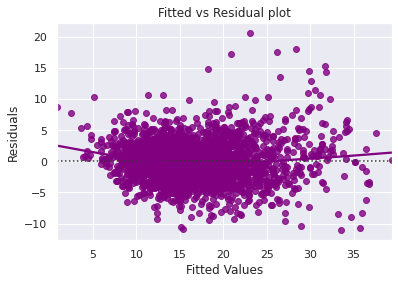

In [ ]:
# plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* There are no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

#### TEST FOR NORMALITY

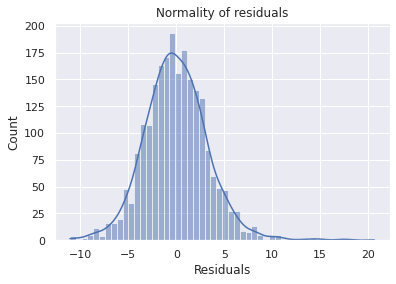

In [ ]:
# Checking for bell shaped curve
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

* The histogram has a bell shaped curve


#### PREDICTION ON TEST DATA

In [ ]:
# predictions on the test set
pred = olsmod2.predict(x_test7)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
678,14.9,14.774613
929,14.4,16.773016
1928,23.1,20.826547
2715,12.9,11.196152
1114,39.0,39.029980
192,14.3,15.446767
1164,9.0,10.026822
231,19.1,18.523190
2129,17.3,16.215995
688,14.8,12.692496


## Final Model

In [ ]:
# Creating final model

x_train_final = x_train7.copy()
x_test_final = x_test7.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())


                            OLS Regression Results                            
Dep. Variable:           poverty_rate   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     233.9
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:34:52   Log-Likelihood:                -5882.0
No. Observations:                2238   AIC:                         1.182e+04
Df Residuals:                    2209   BIC:                         1.199e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.35114,2.547389,0.747819,0.744391,17.578201


In [ ]:
# checking model performance on test set (unseen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.592097,2.625056,0.716863,0.707719,17.051053


## Actionable Insights and Recommendations 

* The model is able to explain ~71% of the variation in the data within 17% of the actual poverty_rate, indicating that the model is some what good for predicting poverty_rate

* Increasing econ__pct_civilian_labor by one unit (holding all other features constant) will result in a 26.6 unit decrease in poverty_rate.

* Decreasing econ__pct_unemployment by one unit (holding all other features constant) will resulti in a 45.8 unit decrease in poverty_rate

